# QUELS USAGES DU PORTAIL DE LA MÉDIATHÈQUE ?

In [1]:
import pandas as pd
from datetime import datetime as dt
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

from kiblib.utils.db import DbConn

In [2]:
db_conn = DbConn().create_engine()

In [3]:
 query = """SELECT *
FROM statdb.stat_web2 sw 
WHERE `date` BETWEEN CURDATE() - INTERVAL 12 MONTH AND CURDATE()"""

In [4]:
web = pd.read_sql(query,db_conn)
#web

In [5]:
web['month'] = pd.DatetimeIndex(web['date']).month_name(locale="fr_FR.utf8")
web['year'] = pd.DatetimeIndex(web['date']).year

In [6]:
web['mois'] = web['month'] + ' ' + web['year'].astype(str)
#web

In [7]:
#web_visites_bymonth = web.groupby(['mois','periode','origine'],sort=False)['visites'].sum().reset_index()
web_visites_bymonth = web.groupby(['mois','origine'],sort=False)['visites'].sum().reset_index()
#web_visites_bymonth

In [8]:
web_pages_vues_bymonth = web.groupby(['mois','origine'],sort=False)['pages_vues'].sum().reset_index()
#web_pages_vues_bymonth

In [9]:
web_utilisateurs_bymonth = web.groupby(['mois','origine'],sort=False)['utilisateurs'].sum().reset_index()
#web_utilisateurs_bymonth

In [10]:
params = {'axes.titlesize': 15,
          'axes.titleweight':'bold',
          'axes.grid':'y',
          'axes.labelweight':'bold',
          'legend.shadow':True,
          'figure.subplot.hspace': 0.7,
          'figure.figsize':(15,7),
         }

plt.rcParams.update(params)

> L'indicateur `utilisateurs`n'est pas très fiable puisqu'il se base sur les cookies pour distinguer chaque utilisateur. Si une personne refuse les cookies du site web, elle est comptée comme un nouvel `utilisateur`par la machine.

In [11]:
web_tx_conversion_bymonth = web.groupby(['mois','origine'],sort=False)['taux_conversion'].mean().reset_index()
#web_tx_conversion_bymonth

In [12]:
params = {'axes.titlesize': 13,
          'axes.titleweight':'bold',
          'axes.grid':'y',
          'axes.labelweight':'bold',
          'legend.shadow':True,
          'figure.subplot.hspace': 0.8,
          'figure.figsize':(15,20),
         }

sns.color_palette('rocket')

plt.rcParams.update(params)

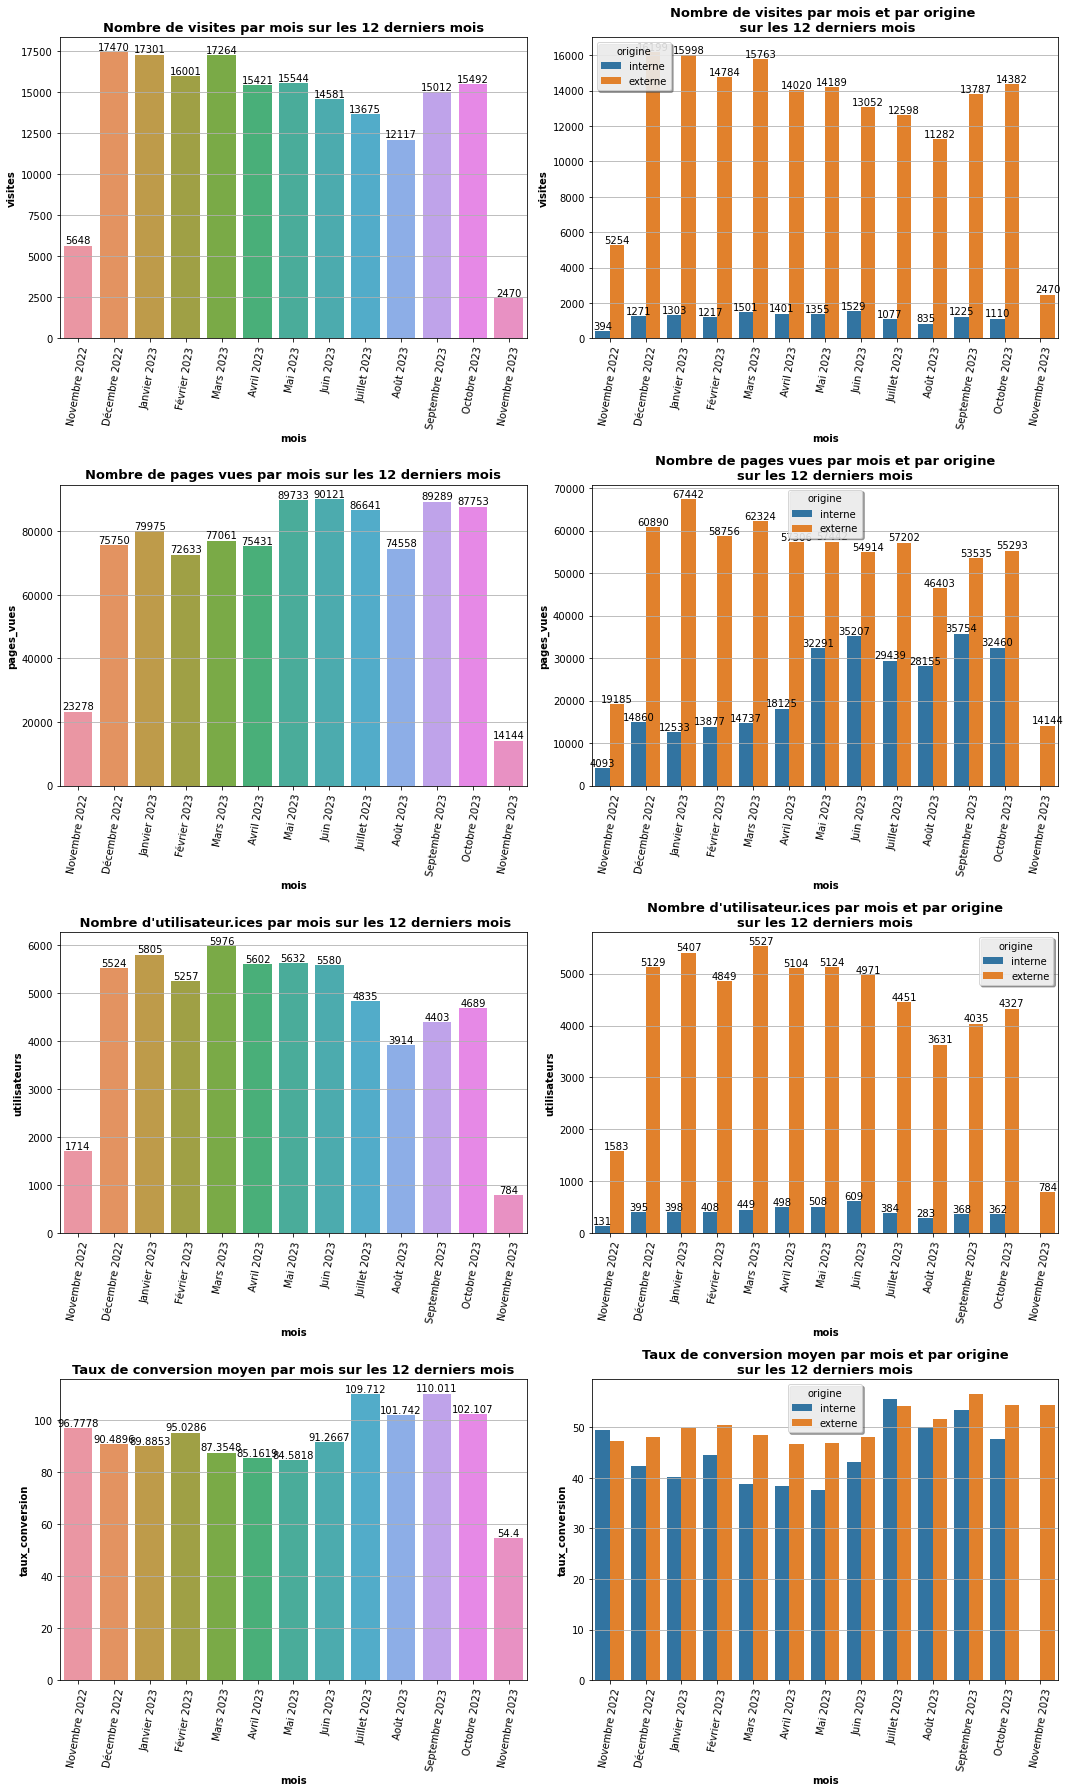

In [13]:
f,axs = plt.subplots(4,2,figsize=(15,25))

sns.barplot(data=web_visites_bymonth,x='mois',y='visites',ci=None,estimator=sum,ax=axs[0,0])
axs[0,0].set_title('Nombre de visites par mois sur les 12 derniers mois')
axs[0,0].tick_params(rotation=80,axis='x')
for i in axs[0,0].containers:
    axs[0,0].bar_label(i,)

sns.barplot(data=web_visites_bymonth,x='mois',y='visites',ci=None,hue='origine',ax=axs[0,1])
axs[0,1].set_title('Nombre de visites par mois et par origine \n sur les 12 derniers mois')
axs[0,1].tick_params(rotation=80,axis='x')
for i in axs[0,1].containers:
    axs[0,1].bar_label(i,)

sns.barplot(data=web_pages_vues_bymonth,x='mois',y='pages_vues',ci=None,estimator=sum,ax=axs[1,0])
axs[1,0].set_title('Nombre de pages vues par mois sur les 12 derniers mois')
axs[1,0].tick_params(rotation=80,axis='x')
for i in axs[1,0].containers:
    axs[1,0].bar_label(i,)

sns.barplot(data=web_pages_vues_bymonth,x='mois',y='pages_vues',ci=None,hue='origine',ax=axs[1,1])
axs[1,1].set_title('Nombre de pages vues par mois et par origine\nsur les 12 derniers mois')
axs[1,1].tick_params(rotation=80,axis='x')
for i in axs[1,1].containers:
    axs[1,1].bar_label(i,)


sns.barplot(data=web_utilisateurs_bymonth,x='mois',y='utilisateurs',ci=None,estimator=sum,ax=axs[2,0])
axs[2,0].set_title(" Nombre d'utilisateur.ices par mois sur les 12 derniers mois")
axs[2,0].tick_params(rotation=80,axis='x')
for i in axs[2,0].containers:
    axs[2,0].bar_label(i,)


sns.barplot(data=web_utilisateurs_bymonth,x='mois',y='utilisateurs',ci=None,hue='origine',ax=axs[2,1])
axs[2,1].set_title("Nombre d'utilisateur.ices par mois et par origine\nsur les 12 derniers mois")
axs[2,1].tick_params(rotation=80,axis='x')
for i in axs[2,1].containers:
    axs[2,1].bar_label(i,)


sns.barplot(data=web_tx_conversion_bymonth,x='mois',y='taux_conversion',ci=None,estimator=sum,ax=axs[3,0])
axs[3,0].set_title('Taux de conversion moyen par mois sur les 12 derniers mois')
axs[3,0].tick_params(rotation=80,axis='x')
for i in axs[3,0].containers:
    axs[3,0].bar_label(i,)

sns.barplot(data=web_tx_conversion_bymonth,x='mois',y='taux_conversion',ci=None,hue='origine',ax=axs[3,1])
axs[3,1].set_title("Taux de conversion moyen par mois et par origine\nsur les 12 derniers mois")
axs[3,1].tick_params(rotation=80,axis='x')
#for i in axs[3,1].containers:
#    axs[3,1].bar_label(i,)
   
f.tight_layout()

In [14]:
total_visites = web['visites'].sum()
total_pages_vues = web['pages_vues'].sum()
total_utilisateurs = web['utilisateurs'].sum()
taux_conversion = web['taux_conversion'].mean()

In [15]:
taux_conversion = np.round(taux_conversion,2)

In [16]:
mois_min = web_visites_bymonth['mois'].iloc[0]
mois_max = web_visites_bymonth['mois'].iloc[-1]

### Chiffre sur les 12 derniers mois

In [17]:
print(f'{total_visites} visites')
print(f'{total_pages_vues} pages vues')
print(f'{total_utilisateurs} utilisateur.ices')
print(f'{taux_conversion}% : taux de conversion moyen')

177996 visites
936367 pages vues
59715 utilisateur.ices
47.75% : taux de conversion moyen
